# Speech Intelligibility Restoration

###  Load the Noisy and Clean Audio

In [3]:
import torchaudio

# Load noisy, clean, and denoised (proceed) audio files
noisy_waveform, sr = torchaudio.load('dataset/noisy/file1.wav')
clean_waveform, _ = torchaudio.load('dataset/clean/file1.wav')
proceed_waveform, _ = torchaudio.load('output/file1.wav')

# Trim to same length
min_len = min(noisy_waveform.shape[-1], clean_waveform.shape[-1], proceed_waveform.shape[-1])
noisy_waveform = noisy_waveform[:, :min_len]
clean_waveform = clean_waveform[:, :min_len]
proceed_waveform = proceed_waveform[:, :min_len]


In [2]:
import torch
import torchaudio

# Load paths
noisy_path = 'dataset/noisy/file1.wav'
clean_path = 'dataset/clean/file1.wav'
denoised_path = 'output/file1.wav'  # Your model's output

# Load waveforms
noisy_waveform, sr = torchaudio.load(noisy_path)
clean_waveform, _ = torchaudio.load(clean_path)
denoised_waveform, _ = torchaudio.load(denoised_path)

# Trim all to the same length
min_len = min(noisy_waveform.shape[-1], clean_waveform.shape[-1], denoised_waveform.shape[-1])
noisy_waveform = noisy_waveform[:, :min_len]
clean_waveform = clean_waveform[:, :min_len]
denoised_waveform = denoised_waveform[:, :min_len]

# --- SNR for Noisy vs Clean ---
noise_from_noisy = noisy_waveform - clean_waveform
signal_power = torch.mean(clean_waveform ** 2).item()
noise_power_noisy = torch.mean(noise_from_noisy ** 2).item()
snr_noisy = 10 * torch.log10(torch.tensor(signal_power / (noise_power_noisy + 1e-10)))

# --- SNR for Denoised vs Clean ---
noise_from_denoised = denoised_waveform - clean_waveform
noise_power_denoised = torch.mean(noise_from_denoised ** 2).item()
snr_denoised = 10 * torch.log10(torch.tensor(signal_power / (noise_power_denoised + 1e-10)))

# --- SNR for Noisy vs Denoised ---
# Treat denoised as "target", noisy as "noisy version"
noise_between_noisy_denoised = noisy_waveform - denoised_waveform
signal_power_denoised = torch.mean(denoised_waveform ** 2).item()
noise_power_noisy_to_denoised = torch.mean(noise_between_noisy_denoised ** 2).item()
snr_noisy_to_denoised = 10 * torch.log10(torch.tensor(signal_power_denoised / (noise_power_noisy_to_denoised + 1e-10)))

# --- Print results ---
print(f"Clean signal power             : {signal_power:.6f}")
print(f"Noise power (noisy)            : {noise_power_noisy:.6f}")
print(f"SNR (Noisy vs Clean)           : {snr_noisy:.2f} dB")
print(f"Noise power (denoised)         : {noise_power_denoised:.6f}")
print(f"SNR (Denoised vs Clean)        : {snr_denoised:.2f} dB")
print(f"Noise power (noisy→denoised)   : {noise_power_noisy_to_denoised:.6f}")
print(f"SNR (Noisy vs Denoised)        : {snr_noisy_to_denoised:.2f} dB")


Clean signal power             : 0.004232
Noise power (noisy)            : 0.000251
SNR (Noisy vs Clean)           : 12.27 dB
Noise power (denoised)         : 0.000472
SNR (Denoised vs Clean)        : 9.53 dB
Noise power (noisy→denoised)   : 0.000733
SNR (Noisy vs Denoised)        : 4.09 dB


### Visualize the Waveforms


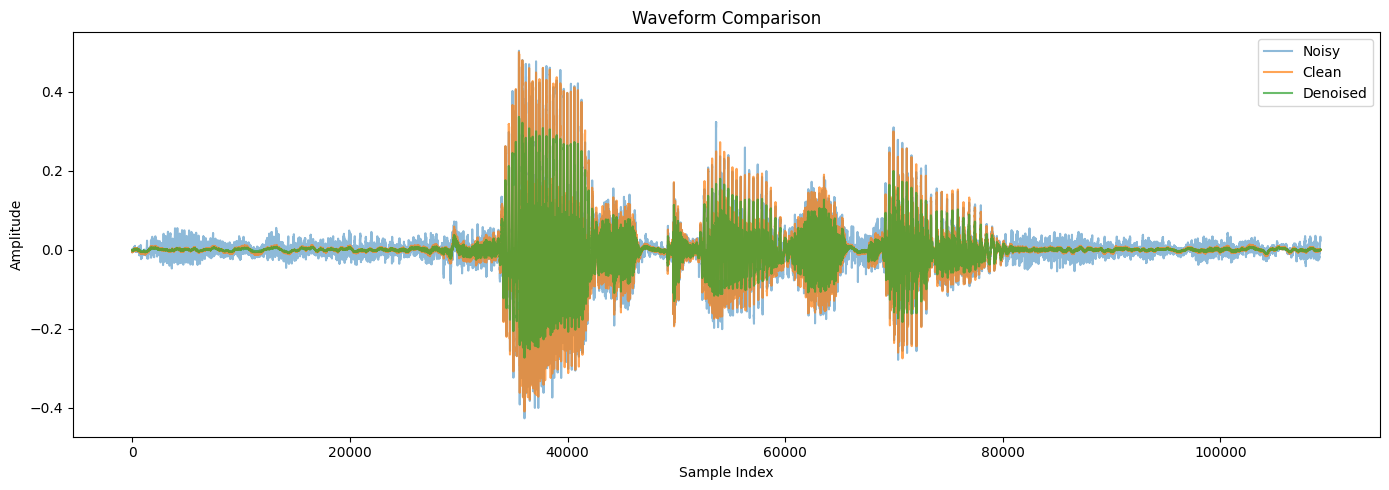

In [ ]:
import matplotlib.pyplot as plt

# Convert to NumPy (assumes mono channel: use [0] for 1st channel)
noisy_np = noisy_waveform[0].numpy()
clean_np = clean_waveform[0].numpy()
denoised_np = denoised_waveform[0].numpy()

# Plot all three
plt.figure(figsize=(14, 5))
plt.plot(noisy_np, label="Noisy", alpha=0.5)
plt.plot(clean_np, label="Clean", alpha=0.7)
plt.plot(denoised_np, label="Denoised", alpha=0.7)
plt.title("Waveform Comparison")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\syedu\AppData\Local\Temp\ipykernel_15844\2832005675.py:21: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\syedu\AppData\Local\Temp\ipykernel_15844\2832005675.py:21: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\syedu\AppData\Local\Temp\ipykernel_15844\2832005675.py:21: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\MODEL\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\MODEL\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\MODEL\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LAR

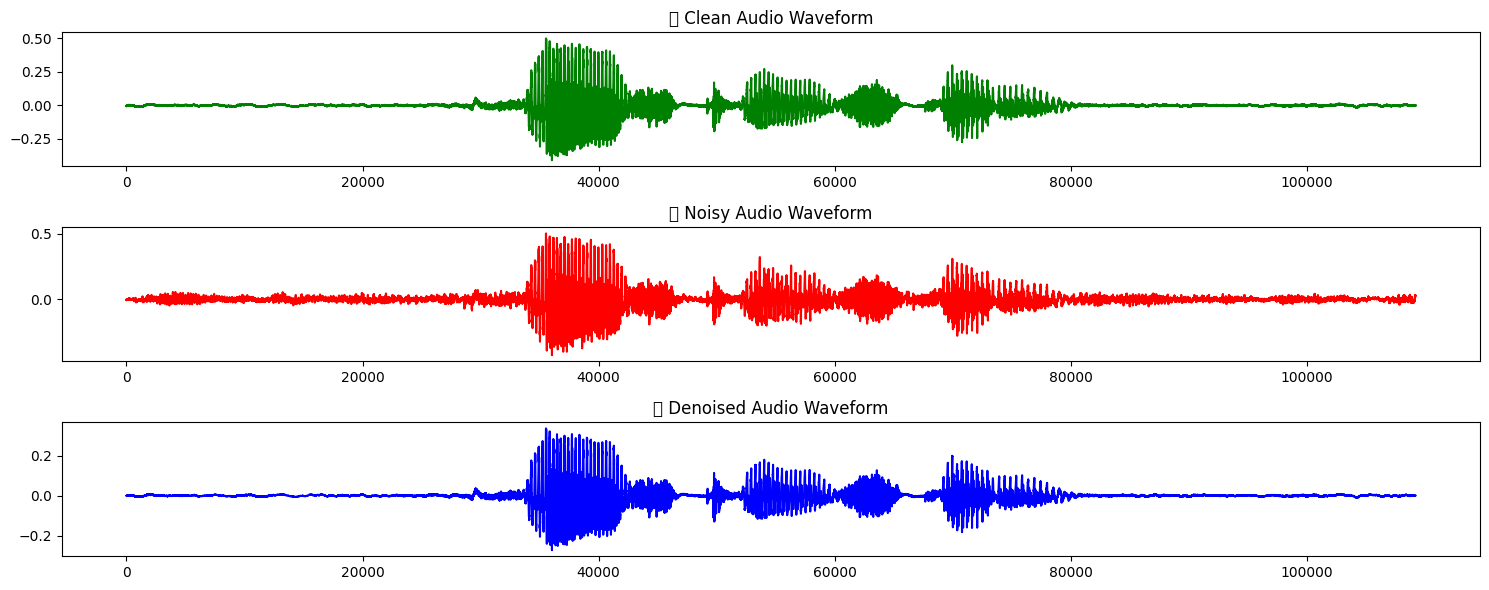

In [9]:
# 📉 Plot Waveforms
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# ✅ Clean
plt.subplot(3, 1, 1)
plt.plot(clean_waveform[0].numpy(), color='green')
plt.title("✅ Clean Audio Waveform")

# 🔴 Noisy
plt.subplot(3, 1, 2)
plt.plot(noisy_waveform[0].numpy(), color='red')
plt.title("🔴 Noisy Audio Waveform")

# 🔵 Denoised
plt.subplot(3, 1, 3)
plt.plot(denoised_waveform[0].numpy(), color='blue')
plt.title("🔵 Denoised Audio Waveform")

plt.tight_layout()
plt.show()


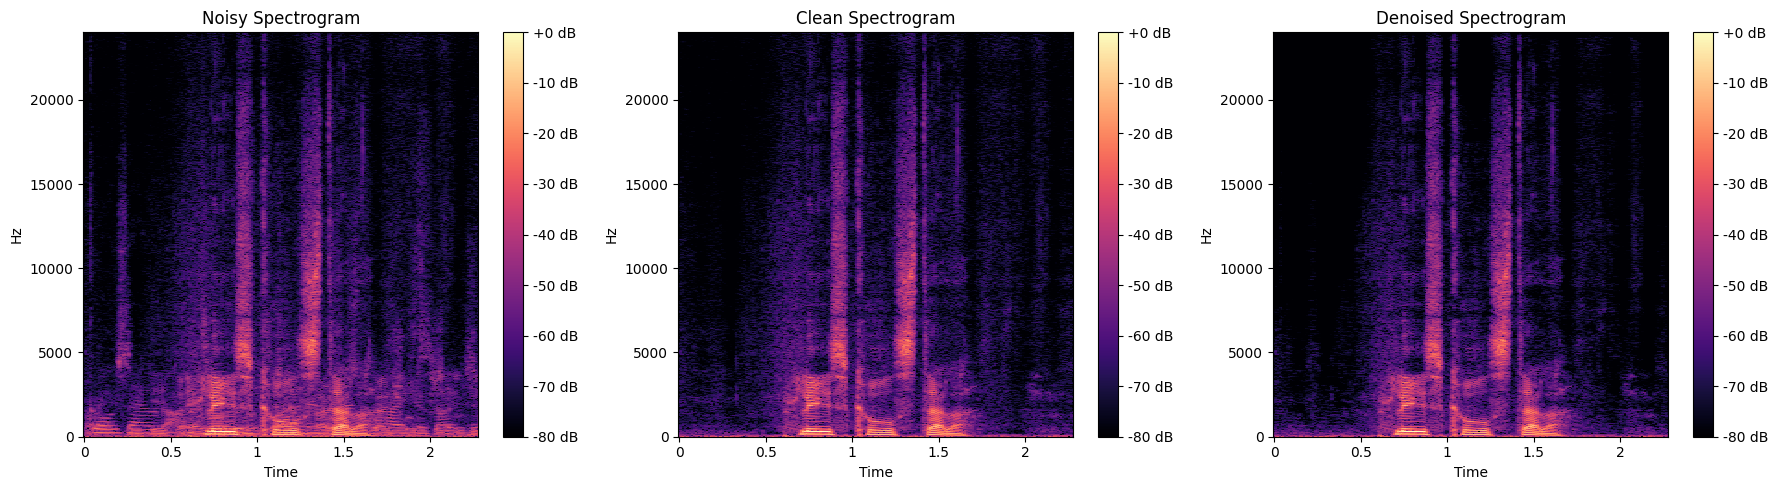

In [5]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Convert torch tensors to NumPy (assuming mono audio)
noisy_np = noisy_waveform[0].numpy()
clean_np = clean_waveform[0].numpy()
denoised_np = denoised_waveform[0].numpy()



# Compute spectrograms
noisy_spec = librosa.amplitude_to_db(np.abs(librosa.stft(noisy_np)), ref=np.max)
clean_spec = librosa.amplitude_to_db(np.abs(librosa.stft(clean_np)), ref=np.max)
denoised_spec = librosa.amplitude_to_db(np.abs(librosa.stft(denoised_np)), ref=np.max)

plt.figure(figsize=(18, 5))  # Wider figure to fit 3 plots side by side

# Subplot 1: Noisy
plt.subplot(1, 3, 1)
librosa.display.specshow(noisy_spec, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.0f dB")
plt.title("Noisy Spectrogram")

# Subplot 2: Clean
plt.subplot(1, 3, 2)
librosa.display.specshow(clean_spec, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.0f dB")
plt.title("Clean Spectrogram")

# Subplot 3: Denoised
plt.subplot(1, 3, 3)
librosa.display.specshow(denoised_spec, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.0f dB")
plt.title("Denoised Spectrogram")

plt.tight_layout()
plt.show()



C:\Users\syedu\AppData\Local\Temp\ipykernel_15844\2276330918.py:29: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\syedu\AppData\Local\Temp\ipykernel_15844\2276330918.py:29: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\syedu\AppData\Local\Temp\ipykernel_15844\2276330918.py:29: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


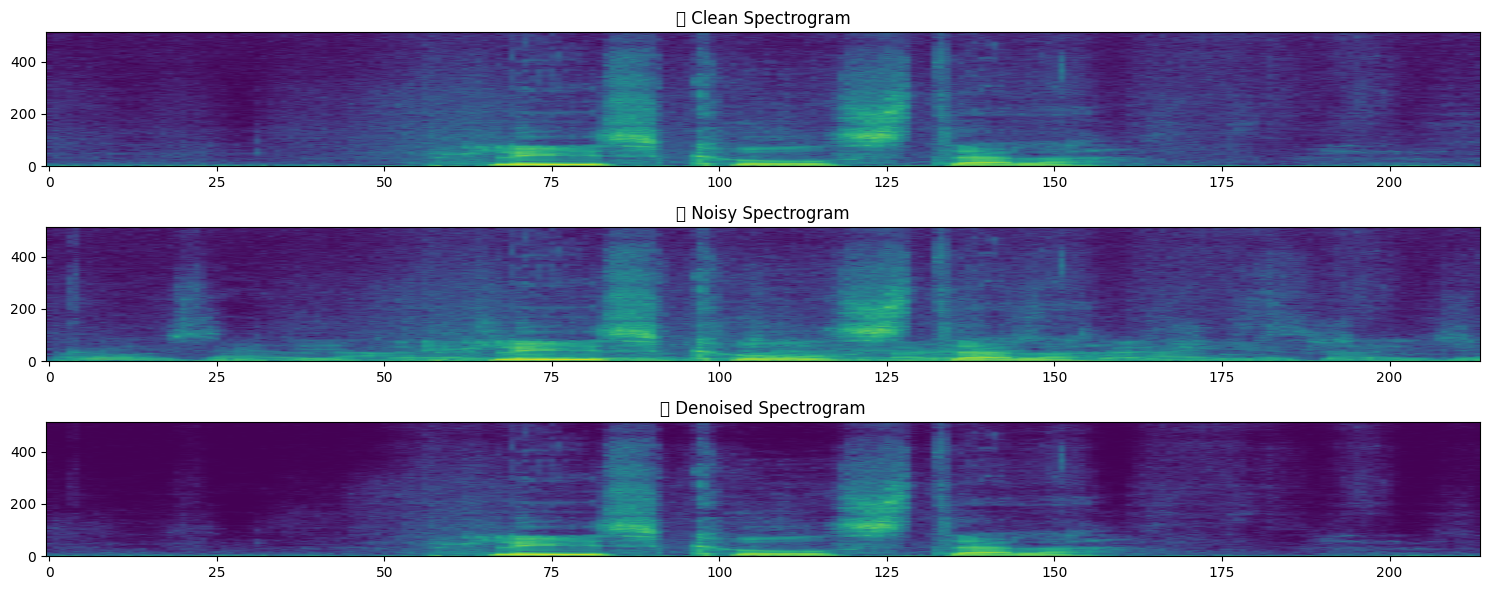

In [10]:
import torchaudio.transforms as T

# 🎛️ Spectrogram transform
spec_transform = T.Spectrogram(n_fft=1024, hop_length=512)

# Compute spectrograms
clean_spec = spec_transform(clean_waveform)
noisy_spec = spec_transform(noisy_waveform)
denoised_spec = spec_transform(denoised_waveform)

# 🔍 Plot Spectrograms
plt.figure(figsize=(15, 6))

# ✅ Clean
plt.subplot(3, 1, 1)
plt.imshow(10 * torch.log10(clean_spec[0] + 1e-5).numpy(), aspect='auto', origin='lower')
plt.title("✅ Clean Spectrogram")

# 🔴 Noisy
plt.subplot(3, 1, 2)
plt.imshow(10 * torch.log10(noisy_spec[0] + 1e-5).numpy(), aspect='auto', origin='lower')
plt.title("🔴 Noisy Spectrogram")

# 🔵 Denoised
plt.subplot(3, 1, 3)
plt.imshow(10 * torch.log10(denoised_spec[0] + 1e-5).numpy(), aspect='auto', origin='lower')
plt.title("🔵 Denoised Spectrogram")

plt.tight_layout()
plt.show()
